In [1]:
import pandas as pd
import matplotlib
matplotlib.rcParams["font.family"] = "Arial"
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer

Matplotlib created a temporary cache directory at /scratch/naotok/13419516/matplotlib-4567uri3 because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


# PCA

## Load PSI matrix

In [ ]:
# Jul24
psi_matrix_df = pd.read_csv("/rhome/naotok/bigdata/Ptbp1_astrocyte/Jul24/Shiba/results/splicing/PSI_matrix_sample.txt", sep = "\t")
psi_matrix_df = psi_matrix_df.drop(columns = ["event_id"])
psi_matrix_df.head()

,pos_id,KO_F_1,KO_M_3,KO_M_4,WT_F_1,WT_F_2,WT_F_3
0,SE@GL456216.1@30699-30806@16407-31059,0.941834,0.916168,0.872123,1.000000,1.000000,0.894886
1,SE@GL456216.1@31370-31471@31127-34138,0.668998,0.932773,0.733333,0.566787,0.926702,0.790698
2,SE@GL456233.1@28308-28390@24962-28976,0.144928,0.053435,0.074733,0.152318,0.047210,0.053876
3,SE@GL456233.1@326114-326350@285515-332450,0.845161,0.859459,0.913978,0.730104,0.793358,1.000000
4,SE@JH584304.1@56986-57151@55701-58564,0.884457,0.920290,0.940334,0.921260,0.939036,1.000000


In [3]:
# Mouse neuronal development (ENCODE)
psi_matrix_neuron_df = pd.read_csv("/rhome/naotok/bigdata/NeuronalMaturationSplicing/splicing/ENCODE_Mouse_Forebrain/Shiba/results/splicing/PSI_matrix_sample.txt", sep = "\t")
psi_matrix_neuron_df = psi_matrix_neuron_df.drop(columns = ["event_id"])
# group
group_df = pd.read_csv("/rhome/naotok/NeuronalMaturationSplicing/scripts/splicing/experiment_ENCODE_Mouse_Forebrain.txt", sep = "\t", usecols = ["sample", "group"])
group_dict = {k: v for k, v in zip(group_df["sample"], group_df["group"])}
# psi_matrix_neuron_df.columns = [group_dict[x] + "_" + x if x != "pos_id" else x for x in psi_matrix_neuron_df.columns]
psi_matrix_neuron_df

,pos_id,E10_1,E10_2,E11_1,E11_2,E12_1,E12_2,E13_1,E13_2,E14_1,E14_2,E15_1,E15_2,E16_1,E16_2,P0_1,P0_2
0,SE@GL456216.1@30699-30792@16407-31059,0.777778,0.853659,0.925926,0.806452,0.815789,0.780822,0.823529,0.743590,0.733333,0.769231,0.650000,NaN,NaN,NaN,NaN,0.391304
1,SE@GL456216.1@30699-30806@16407-31059,0.863014,0.907692,0.948718,0.900000,0.886179,0.862069,0.884615,0.836066,0.804878,0.806452,0.815789,0.842105,0.857143,0.833333,0.694915,0.575758
2,SE@JH584304.1@54721-54867@54479-55112,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.977011,1.000000,1.000000,1.000000,1.000000,0.989848,0.990385
3,SE@JH584304.1@56986-57151@55701-58564,0.936508,0.947826,0.920635,0.933333,0.956113,0.945111,0.969957,0.942740,0.712707,0.678322,0.940762,0.917808,0.942857,0.920319,0.840000,0.788698
4,SE@JH584304.1@58564-58835@55701-59592,1.000000,1.000000,0.984615,0.971831,0.986842,0.981603,0.981004,0.997516,0.980296,0.920000,0.972678,0.983815,0.985612,0.981718,0.959664,0.987854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81243,ALE@chrX@94253126-94272648@94253126-94272356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81244,ALE@chrX@95049346-95058817@95055011-95058817,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
81245,ALE@chrX@98803180-98890082@98874022-98890082,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.964912,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
81246,ALE@chrX@99468314-99470617@99468600-99470617,0.922857,0.940984,0.955947,0.955631,0.949495,0.963158,0.963801,0.970414,0.970588,0.970387,0.971714,0.967603,0.982262,0.967568,0.915000,0.905473


## Merge

In [ ]:
psi_matrix_merge_df = pd.merge(psi_matrix_df, psi_matrix_neuron_df, on = "pos_id")
psi_matrix_merge_df = psi_matrix_merge_df.set_index("pos_id")

In [5]:
def mtx2pca(df, genes) -> pd.DataFrame:
    '''
    Perform PCA on the input dataframe

    Args:
    - df (pd.DataFrame): input dataframe
    - genes (int): number of highly-variable genes to calculate PCs

    Returns:
    - feature_df (pd.DataFrame): dataframe containing principal components
    - contribution_df (pd.DataFrame): dataframe containing the contribution of each principal component
    '''
    df = df.dropna()
    # Keep rows of top n highly-variable genes
    if df.shape[0] > genes:
        df = df.loc[df.var(axis=1).sort_values(ascending=False).index[:genes]]
    # Z-score normalization across samples
    normalized_df = df.T.apply(stats.zscore, ddof = 1)
    # PCA
    pca = PCA()
    pca.fit(normalized_df)
    # Feature
    feature = pca.transform(normalized_df)
    feature_df = pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(feature))])
    feature_df.index = df.columns
    # Contribution
    contribution_df = pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(feature))])
    return(feature_df, contribution_df)

In [6]:
feature_df, contribution_df = mtx2pca(psi_matrix_merge_df, 3000)
PC1_contribution = (contribution_df[0][0]*100).round(2)
PC2_contribution = (contribution_df[0][1]*100).round(2)
pca_df = feature_df.copy()
pca_df["group"] = pca_df.index.map(lambda x: x.split("_")[0])
pca_df["group"] = pca_df["group"].map(lambda x: x if x != "KO" else "Ptbp1 cKO").map(lambda x: "Control" if x == "WT" else x)

## Plot

In [7]:
color_palette_dict = {}
viridis = sns.color_palette("viridis", n_colors = 9).as_hex()
Set2 = sns.color_palette("Set2").as_hex()
i = 0
for group in ["E10", "E11", "E12", "E13", "E14", "E15", "E16", "P0"]:
    color_palette_dict[group] = viridis[i]
    i+=1
color_palette_dict["Control"] = "black"
color_palette_dict["Ptbp1 cKO"] = "red"
color_palette_dict

{'E10': '#482475',
 'E11': '#414487',
 'E12': '#355f8d',
 'E13': '#2a788e',
 'E14': '#21918c',
 'E15': '#22a884',
 'E16': '#44bf70',
 'P0': '#7ad151',
 'Control': 'black',
 'Ptbp1 cKO': 'red'}

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


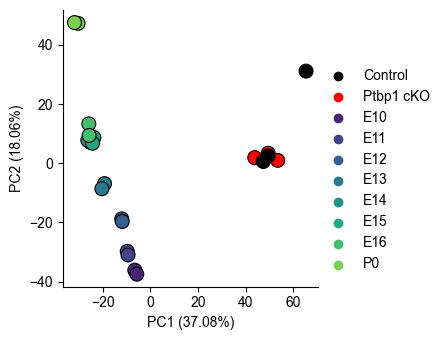

In [ ]:
g = sns.relplot(
    data = pca_df,
    x = "PC1",
    y = "PC2",
    hue = "group",
    hue_order = ["Control", "Ptbp1 cKO"] + ["E10", "E11", "E12", "E13", "E14", "E15", "E16", "P0"],
    s = 100,
    edgecolor = "black",
    height = 3.5,
    aspect = 1,
    palette = color_palette_dict
)
g.set_xlabels(f"PC1 ({PC1_contribution}%)")
g.set_ylabels(f"PC2 ({PC2_contribution}%)")
g._legend.set_title("")
plt.savefig("/rhome/naotok/bigdata/Ptbp1_astrocyte/Jul24/figure/PCA_vs_neuron_ENCODE.png", bbox_inches = "tight", dpi = 1000)


# Correlation of PSI

In [ ]:
DSE_path_dict = {
    "astrocyte": "/rhome/naotok/bigdata/Ptbp1_astrocyte/Jul24/Shiba/results/splicing",
    "neuron": "/rhome/naotok/bigdata/NeuronalMaturationSplicing/splicing/ENCODE_Mouse_Forebrain/Shiba/results/splicing"
}

In [10]:
DSE_set = set()
events_Shiba = ["SE", "FIVE", "THREE", "MXE", "RI", "MSE", "AFE", "ALE"]
for path in DSE_path_dict:
    for event in events_Shiba:
        tmp_df = pd.read_csv(DSE_path_dict[path] + "/PSI_" + event + ".txt", sep = "\t")
        DSE_set = DSE_set | set(tmp_df[(tmp_df["Diff events"] == "Yes") & (tmp_df["p_ttest"] < 0.05)]["pos_id"])

In [11]:
len(DSE_set)

2643

In [12]:
psi_matrix_merge_melt_df = psi_matrix_merge_df.reset_index().melt(id_vars = "pos_id", var_name = "sample", value_name = "PSI")
psi_matrix_merge_melt_df = psi_matrix_merge_melt_df[psi_matrix_merge_melt_df["pos_id"].isin(DSE_set)]
psi_matrix_merge_melt_df["group"] = psi_matrix_merge_melt_df["sample"].map(lambda x: x.split("_")[0])
psi_matrix_merge_melt_df = psi_matrix_merge_melt_df.groupby(["pos_id", "group"], as_index = False).mean()
psi_matrix_mean_df = psi_matrix_merge_melt_df.pivot(index = "pos_id", columns = "group", values = "PSI")
psi_matrix_mean_df = psi_matrix_mean_df.rename(columns = {"WT": "Control", "KO": "Ptbp1 cKO"})
psi_matrix_mean_df = psi_matrix_mean_df[["Control", "Ptbp1 cKO", "E10", "P0"]]
psi_matrix_mean_df = psi_matrix_mean_df*100
psi_matrix_mean_df = psi_matrix_mean_df.dropna()
psi_matrix_mean_df.head()

/scratch/naotok/13419516/ipykernel_2417092/903782386.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  psi_matrix_merge_melt_df = psi_matrix_merge_melt_df.groupby(["pos_id", "group"], as_index = False).mean()


group,Control,Ptbp1 cKO,E10,P0
pos_id,,,,
AFE@chr10@127063759-127064585@127064453-127064585,10.338522,9.327526,1.630153,17.597980
AFE@chr10@13291962-13388695@13291962-13324064,0.000000,4.687500,2.380952,50.000000
AFE@chr10@26352375-26375911@26352375-26373701,3.571429,39.351852,76.470588,89.204545
AFE@chr10@26352375-26375911@26352375-26375110,8.333333,93.750000,76.470588,83.750000
AFE@chr10@29313297-29317507@29313733-29317507,41.325613,45.549290,9.555556,49.780220


In [13]:
psi_matrix_mean_df.corr(method = "spearman")

group,Control,Ptbp1 cKO,E10,P0
group,,,,
Control,1.000000,0.891448,0.752573,0.345293
Ptbp1 cKO,0.891448,1.000000,0.761137,0.331589
E10,0.752573,0.761137,1.000000,0.204704
P0,0.345293,0.331589,0.204704,1.000000


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


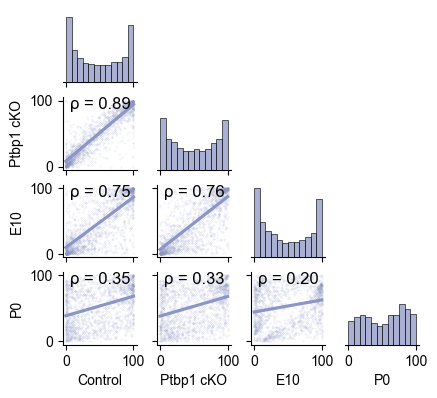

In [ ]:
g = sns.pairplot(
    data = psi_matrix_mean_df,
    kind = "reg",
    corner = True,
    plot_kws = {
        "scatter_kws": {"alpha": 0.3, "s": 0.05, "color": "#8c96c6"},
        "line_kws": {"color": "#8c96c6"}
    },
    diag_kws = {"color": "#8c96c6"},
    height = 1, aspect = 1.1
)
# Calculate and add Spearman's correlation coefficients in the same plot space
for i in range(len(g.axes)):
    for j in range(i):
        ax = g.axes[i, j]
        x = psi_matrix_mean_df.iloc[:, j]
        y = psi_matrix_mean_df.iloc[:, i]
        corr, _ = stats.spearmanr(x, y)
        ax.annotate(f"ρ = {corr:.2f}", 
                    xy=(0.1, 0.9), xycoords='axes fraction', 
                    ha='left', va='center', fontsize=12)
plt.savefig("/rhome/naotok/bigdata/Ptbp1_astrocyte/Jul24/figure/pairplot_vs_neuron_ENCODE.png", bbox_inches = "tight", dpi = 1000)

# dPSI of DSE in astrocyte vs. brain development

In [ ]:
events_Shiba = ["SE", "FIVE", "THREE", "MXE", "RI", "MSE", "AFE", "ALE"]
Shiba_astrocyte_df = pd.DataFrame()
DSE_astrocyte_set = set()
for event in events_Shiba:
    tmp_df = pd.read_csv("/rhome/naotok/bigdata/Ptbp1_astrocyte/Jul24/Shiba/results/splicing/PSI_" + event + ".txt", sep = "\t")
    tmp_diff = set(tmp_df[(tmp_df["Diff events"] == "Yes") & (tmp_df["p_ttest"] < 0.05)]["pos_id"])
    DSE_astrocyte_set = DSE_astrocyte_set | tmp_diff
    tmp_df["group"] = "astrocyte"
    tmp_df = tmp_df[["pos_id", "Diff events", "dPSI", "group"]]
    Shiba_astrocyte_df = tmp_df if Shiba_astrocyte_df.empty else pd.concat([Shiba_astrocyte_df, tmp_df])

In [16]:
Shiba_astrocyte_df

,pos_id,Diff events,dPSI,group
0,SE@chr10@79856504-79856534@79854721-79858752,Yes,-0.850777,astrocyte
1,SE@chr8@70599840-70599899@70599757-70600396,Yes,-0.150211,astrocyte
2,SE@chr12@111825576-111825632@111825108-111827543,Yes,0.167704,astrocyte
3,SE@chr12@111825579-111825632@111825108-111827543,Yes,0.170582,astrocyte
4,SE@chr2@152703995-152704194@152700268-152704622,Yes,0.182524,astrocyte
...,...,...,...,...
2769,ALE@chrX@7889763-7894191@7889763-7892140,No,0.000000,astrocyte
2770,ALE@chrX@7892867-7894191@7892867-7893968,No,0.000000,astrocyte
2771,ALE@chrX@8141208-8143251@8142955-8143251,No,0.000000,astrocyte
2772,ALE@chrX@95049346-95058817@95055011-95058817,No,0.000000,astrocyte


In [17]:
Shiba_Brain_df = pd.DataFrame()
DSE_Brain_set = set()
for event in events_Shiba:
    tmp_df = pd.read_csv("/rhome/naotok/bigdata/NeuronalMaturationSplicing/splicing/ENCODE_Mouse_Forebrain/Shiba/results/splicing/PSI_" + event + ".txt", sep = "\t")
    tmp_diff = set(tmp_df[(tmp_df["Diff events"] == "Yes")]["pos_id"])
    DSE_Brain_set = DSE_Brain_set | tmp_diff
    tmp_df["group"] = "Brain"
    tmp_df = tmp_df[["pos_id", "Diff events", "dPSI", "group"]]
    Shiba_Brain_df = tmp_df if Shiba_Brain_df.empty else pd.concat([Shiba_Brain_df, tmp_df])

In [18]:
DSE_astrocyte_Brain_set = DSE_astrocyte_set | DSE_Brain_set
Shiba_astrocyte_Brain_df = pd.concat([Shiba_astrocyte_df, Shiba_Brain_df])
Shiba_astrocyte_Brain_df = Shiba_astrocyte_Brain_df[Shiba_astrocyte_Brain_df["pos_id"].isin(DSE_astrocyte_Brain_set)]
Shiba_astrocyte_Brain_pivot_df = Shiba_astrocyte_Brain_df.pivot(index = "pos_id", columns = "group", values = "dPSI").dropna()
Shiba_astrocyte_Brain_pivot_df = Shiba_astrocyte_Brain_pivot_df*100
Shiba_astrocyte_Brain_pivot_df

group,Brain,astrocyte
pos_id,,
AFE@chr10@127063759-127064585@127064453-127064585,15.936011,-0.883344
AFE@chr10@12765332-12861568@12765332-12813446,-35.743119,-26.923077
AFE@chr10@128747998-128765147@128748566-128765147,-12.615431,-15.438787
AFE@chr10@13291962-13388695@13291962-13324064,43.388704,6.000000
AFE@chr10@26352375-26375911@26352375-26373701,11.352657,37.545591
...,...,...
THREE@chrX@73948418-73948902@73948286-73948902,27.729469,-18.155905
THREE@chrX@74017511-74018130@74017430-74018130,-5.212766,-13.333333
THREE@chrX@74386791-74387034@74386716-74387034,4.242637,13.178560


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


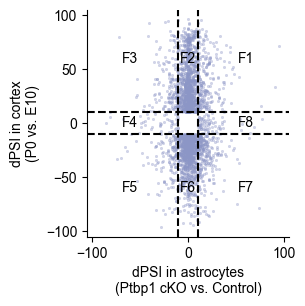

In [ ]:
g = sns.relplot(
    data = Shiba_astrocyte_Brain_pivot_df,
    x = "astrocyte",
    y = "Brain",
    height = 3,
    s = 4,
    edgecolor = None,
    alpha = 0.4,
    color = "#8c96c6"
)
g.set(xlim = (-105, 105), ylim = (-105, 105))
g.set_xlabels("dPSI in astrocytes\n(Ptbp1 cKO vs. Control)")
g.set_ylabels("dPSI in cortex\n(P0 vs. E10)")
plt.axhline(10, color = "black", ls = "--")
plt.axhline(-10, color = "black", ls = "--")
plt.axvline(10, color = "black", ls = "--")
plt.axvline(-10, color = "black", ls = "--")

# Display counts in each fraction
plt.text(60, 60, 'F1', ha='center', va='center')
plt.text(0, 60, 'F2', ha='center', va='center')
plt.text(-60, 60, 'F3', ha='center', va='center')
plt.text(-60, 0, 'F4', ha='center', va='center')
plt.text(-60, -60, 'F5', ha='center', va='center')
plt.text(0, -60, 'F6', ha='center', va='center')
plt.text(60, -60, 'F7', ha='center', va='center')
plt.text(60, 0, 'F8', ha='center', va='center')
plt.savefig("/rhome/naotok/bigdata/Ptbp1_astrocyte/Jul24/figure/relplot_vs_Brain_P0vsE10_dPSI.png", bbox_inches = "tight", dpi = 1000)

In [20]:
def dPSI_grouping(x):
    if x["astrocyte"] > 10:
        if x["Brain"] > 10:
            group = "F1"
        elif x["Brain"] > -10:
            group = "F8"
        elif x["Brain"] < -10:
            group = "F7"
    elif x["astrocyte"] < -10:
        if x["Brain"] > 10:
            group = "F3"
        elif x["Brain"] > -10:
            group = "F4"
        elif x["Brain"] < -10:
            group = "F5"
    else:
        if x["Brain"] > 10:
            group = "F2"
        elif x["Brain"] < -10:
            group = "F6"
    return(group)

Shiba_astrocyte_Brain_pivot_df["group"] = Shiba_astrocyte_Brain_pivot_df.apply(dPSI_grouping, axis = 1)

In [21]:
Shiba_astrocyte_Brain_group_size_df = Shiba_astrocyte_Brain_pivot_df.groupby("group", as_index = False).size()
Shiba_astrocyte_Brain_group_size_df["fraction"] = Shiba_astrocyte_Brain_group_size_df["size"].map(lambda x: round(100*(x / Shiba_astrocyte_Brain_pivot_df.shape[0]), 2))
Shiba_astrocyte_Brain_group_size_df

,group,size,fraction
0,F1,242,7.75
1,F2,1072,34.33
2,F3,178,5.70
3,F4,49,1.57
4,F5,163,5.22
5,F6,1072,34.33
6,F7,263,8.42
7,F8,84,2.69


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


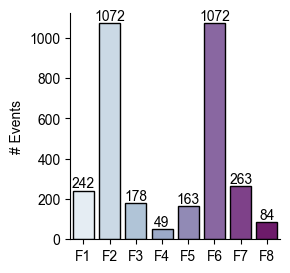

In [ ]:
g = sns.catplot(
    data = Shiba_astrocyte_Brain_group_size_df,
    x = "group",
    y = "size",
    kind = "bar",
    palette = "BuPu",
    height = 3,
    linewidth = 1,
    edgecolor = "black"
)
g.set_xlabels("")
g.set_ylabels("# Events")
# Add text on top of each bar
for ax in g.axes.flat:
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2,  # x-position of the text
            p.get_height(),  # y-position of the text
            int(p.get_height()),  # text to display
            ha="center",  # horizontal alignment
            va="bottom"   # vertical alignment
        )
plt.savefig("/rhome/naotok/bigdata/Ptbp1_astrocyte/Jul24/figure/catplot_vs_Brain_P0vsE10_size.png", bbox_inches = "tight", dpi = 1000)